In [1]:
import torch
from PIL import Image
from IPython.display import display

from vqa.ResnetVQA import VQAProcessor, VisualResnetForQuestionAnswering, wrap_model

In [2]:
from GradCam import GradCamForVQA

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
processor = VQAProcessor('vqa/models/processor.pth', device)
model = VisualResnetForQuestionAnswering(processor, device)
model = wrap_model(model)

In [5]:
layer = model.module.module.resnet_layer4.r_model.layer4

In [6]:
gc = GradCamForVQA(model, layer, processor, device)

Cannot peform backprop on RNN if torch.backends.cudnn.enabled
Disabling...


In [7]:
image = Image.open("sample_images/vqa_images/texting.jpg")
question = "What is she doing?"

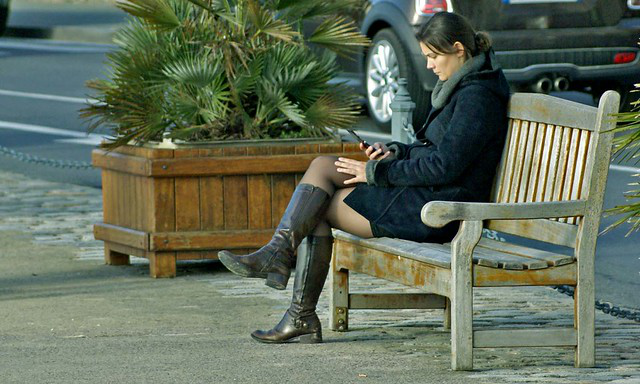

Question: What is she doing?
Answer: texting


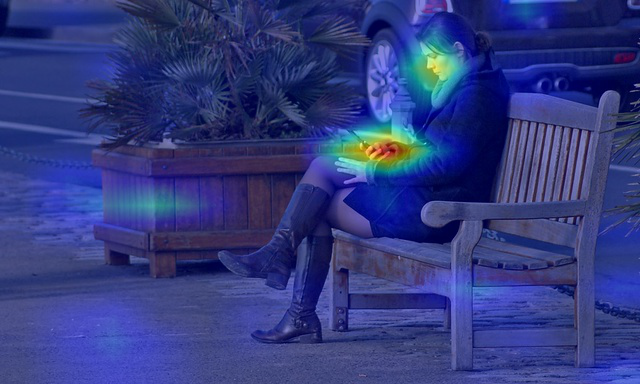

In [9]:
display(image)
print(f"Question: {question}")
gc(image, question)